In [30]:
library(dplyr)
library(tidyr)
library(tibble)
library(ggplot2)
library(stringr)
library(ggstream)
library(ggrepel)
source('../helper_function/helper_function_IHA.r')

In [31]:
color_annotation<-read.csv('../Color_hex_codes/Cell_Type_Color_Annotation_and_Order.csv')
color_vector <- setNames(color_annotation$color, color_annotation$label)

In [32]:
df<-read.csv("03_Get_Counts/SF4_Freq.csv")

# CD8 T

In [4]:
selected_celltype<-c('Core naive CD8 T cell',
                     'CM CD8 T cell',
                     'KLRF1- GZMB+ CD27- EM CD8 T cell',
                     'KLRF1+ GZMB+ CD27- EM CD8 T cell',
                     'GZMK+ CD27+ EM CD8 T cell',
                     'GZMK- CD27+ EM CD8 T cell')

In [5]:
df_subset<-df%>% filter(celltypist_l3 %in% selected_celltype)

In [6]:
df_subset<-df_subset %>%
  dplyr::group_by(pbmc_sample_id)%>% 
  complete_with_pseudocount(sample_col  = "sample.sampleKitGuid",
  count_col   = "count",
  var_col     = "celltypist_l3",
  pseudocount = 1) %>%                       
  dplyr::mutate(percentage = (count / sum(count)) * 100) %>% 
  dplyr::group_by(pbmc_sample_id) %>%     
  dplyr::mutate(percentage_clr = clr_transform((percentage))) %>% 
  dplyr::ungroup() %>% as.data.frame(.)

In [7]:
df_subset<-df_subset %>%
  dplyr::group_by(Ages,celltypist_l3) %>%     
summarize(mean_count=mean(count)) %>% dplyr::group_by(Ages) %>%     
  dplyr::mutate(percentage = (mean_count / sum(mean_count)) ) 

`summarise()` has grouped output by 'Ages'. You can override using the
`.groups` argument.


In [8]:
df_subset_CD8T<-df_subset

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


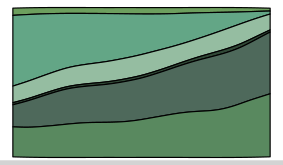

In [9]:
options(repr.plot.width = 60/25.4, repr.plot.height = 35/25.4)

p<-ggplot(df_subset ,aes(x = Ages, 
             y = percentage,
             group = celltypist_l3,
             fill = celltypist_l3)) +
  ggstream::geom_stream(color = 'black', 
                        lwd = 0.25,
                        bw = 1) + 

  scale_fill_manual(values = color_vector) +theme_void(base_size=6)+ 
 
theme(legend.position = "none")+guides(fill=guide_legend(ncol=2))+
  theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        panel.border = element_blank(),
        axis.line.x = element_line(size = 2, linetype = "solid", colour = "lightgrey"),
        axis.line.y = element_blank(),
        panel.grid.minor = element_blank(),
        panel.grid.major.x = element_blank())


p
ggsave('FigureD-1.pdf',p,width = 60/25.4,height = 35/25.4)


# CD4 T

In [10]:
selected_celltype<-c('CM CD4 T cell',
                     'GZMB- CD27+ EM CD4 T cell',
                     'GZMB- CD27- EM CD4 T cell',
                     'Core naive CD4 T cell',
                     'KLRF1- GZMB+ CD27- memory CD4 T cell')

In [11]:
df_subset<-df%>% filter(celltypist_l3 %in% selected_celltype)

In [12]:
df_subset<-df_subset %>%
  dplyr::group_by(pbmc_sample_id) %>% 
  complete_with_pseudocount(sample_col  = "sample.sampleKitGuid",
  count_col   = "count",
  var_col     = "celltypist_l3",
  pseudocount = 1)%>%                       
  dplyr::mutate(percentage = (count / sum(count)) * 100) %>% 
  dplyr::group_by(pbmc_sample_id) %>%     
  dplyr::mutate(percentage_clr = clr_transform((percentage))) %>% 
  dplyr::ungroup() %>% as.data.frame(.)

In [13]:
df_subset<-df_subset %>%
  dplyr::group_by(Ages,celltypist_l3) %>%     
summarize(mean_count=mean(count)) %>% dplyr::group_by(Ages) %>%     
  dplyr::mutate(percentage = (mean_count / sum(mean_count)) ) 

`summarise()` has grouped output by 'Ages'. You can override using the
`.groups` argument.


In [14]:
df_subset_CD4T<-df_subset

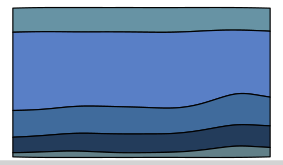

In [15]:
options(repr.plot.width = 60/25.4, repr.plot.height = 35/25.4)

p<-ggplot(df_subset ,aes(x = Ages, 
             y = percentage,
             group = celltypist_l3,
             fill = celltypist_l3)) +
  ggstream::geom_stream(color = 'black', 
                        lwd = 0.25,
                        bw = 1) + 
  scale_fill_manual(values = color_vector) + theme_void(base_size=6)+ 
theme(legend.position = "none")+guides(fill=guide_legend(ncol=2))+
theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        panel.border = element_blank(),
        axis.line.x = element_line(size = 2, linetype = "solid", colour = "lightgrey"),
        axis.line.y = element_blank(),
        panel.grid.minor = element_blank(),
        panel.grid.major.x = element_blank())


p
ggsave('FigureD-2.pdf',p,width = 60/25.4,height = 35/25.4)


# B cell

In [16]:
unique(df$celltypist_l3)[grepl("B cell",unique(df$celltypist_l3))]

[1] "Activated memory B cell"        "CD27+ effector B cell"         
 [3] "CD27- effector B cell"          "CD95 memory B cell"            
 [5] "Core memory B cell"             "Core naive B cell"             
 [7] "Early memory B cell"            "ISG+ naive B cell"             
 [9] "Transitional B cell"            "Type 2 polarized memory B cell"

In [57]:
selected_celltype<-c('Core naive B cell','Transitional B cell','CD95 memory B cell','Core memory B cell',
                    'CD27- effector B cell','CD27+ effector B cell',
                     'Type 2 polarized memory B cell','Early memory B cell')

In [58]:
df_subset<-df%>% filter(celltypist_l3 %in% selected_celltype)

In [65]:
df_subset<-df_subset %>%
  dplyr::group_by(pbmc_sample_id) %>% 
  complete_with_pseudocount(sample_col  = "sample.sampleKitGuid",
  count_col   = "count",
  var_col     = "celltypist_l3",
  pseudocount = 1)%>%                       
  dplyr::mutate(percentage = (count / sum(count)) * 100) %>% 
  dplyr::group_by(pbmc_sample_id) %>%     
  dplyr::mutate(percentage_clr = clr_transform((percentage))) %>% 
  dplyr::ungroup() %>% as.data.frame(.)

In [68]:
df_subset_cd27neg<-df_subset%>% filter(celltypist_l3 =="CD27- effector B cell" )
cor.test(df_subset_cd27neg$Ages,df_subset_cd27neg$percentage_clr,method="spearman")

Warning message in cor.test.default(df_subset_cd27neg$Ages, df_subset_cd27neg$percentage_clr, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  df_subset_cd27neg$Ages and df_subset_cd27neg$percentage_clr
S = 1655984, p-value = 0.0009842
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2144976 


In [56]:
df_subset<-df_subset %>%
  dplyr::group_by(Ages,celltypist_l3) %>%     
  summarize(mean_count=mean(count)) %>% dplyr::group_by(Ages) %>%     
  dplyr::mutate(percentage = (mean_count / sum(mean_count)) ) 

`summarise()` has grouped output by 'Ages'. You can override using the
`.groups` argument.


ERROR: [1m[33mError[39m in `dplyr::group_by()`:[22m
[1m[22m[33m![39m Must group by variables found in `.data`.
[31m✖[39m Column `pbmc_sample_id` is not found.


In [21]:
df_subset_B<-df_subset

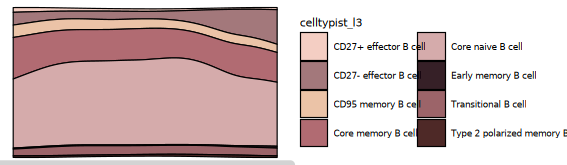

In [22]:
options(repr.plot.width = 120/25.4, repr.plot.height = 35/25.4)

p<-ggplot(df_subset ,aes(x = Ages, 
             y = percentage,
             group = celltypist_l3,
             fill = celltypist_l3)) +
  ggstream::geom_stream(color = 'black', 
                        lwd = 0.25,
                        
                        bw = 1) + 

  scale_fill_manual(values = color_vector) +theme_void(base_size=6)+ 
 
guides(fill=guide_legend(ncol=2))+
  theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        panel.border = element_blank(),
        axis.line.x = element_line(size = 2, linetype = "solid", colour = "lightgrey"),
        axis.line.y = element_blank(),
        panel.grid.minor = element_blank(),
        panel.grid.major.x = element_blank())


p
ggsave('FigureD-3.pdf',p,width = 60/25.4,height = 35/25.4)


In [23]:
df<-do.call(rbind,list(df_subset_CD8T,df_subset_CD4T,df_subset_B))

In [24]:
write.csv(df %>% select(-mean_count),
          "/home//workspace/Source_Data/Fig2c_d_e.csv", row.names=FALSE) 